In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
利用梯度下降法
使用随机梯度下降，并加入mini-batch
"""

'\n利用梯度下降法\n使用随机梯度下降，并加入mini-batch\n'

In [3]:
input = np.loadtxt("data.txt",delimiter=',')
print(input)

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]]


In [5]:
n_row = input.shape[0]

In [6]:
# MSE 作为损失函数 MSE = 1/N * (y_hat - y)^2
def cost(n_row, y_hat, y):
    return 1/n_row * np.dot((y_hat - y).T , (y_hat - y))
    
# 梯度下降法 dcost/dw = 2/N * (y_hat - y) * dy_hat/dw = 2/N * (w * x - y) * x
def gradient(n_row, w, alpha, x_data, y_data):
    return w - alpha * 2/n_row * np.dot((w * x_data - y_data).T , x_data)


In [20]:
# 训练
# 给定初始值 w = 0
w = 0
epoch = 100
cost_sum = np.zeros(epoch)
w_change = np.zeros(epoch)
tran_no = range(0, epoch)
alpha = 0.01
batch = 2
for i in tran_no:
    temp_cost = 0
    temp_w = 0
    # 每次取batch个
    for k in range(0, len(input), batch):
        batch_data = input[k:k+batch]
        x_data = batch_data[:,0:-1]
        y_data = batch_data[:, -1:]
        #print(f"x_data={x_data}, y_data={y_data}")
        y_hat = x_data * w
        n_row = batch
        cost_val = cost(n_row, y_hat, y_data)
        w = gradient(n_row, w, alpha, x_data, y_data)
        temp_cost = temp_cost + cost_val
        temp_w = w
        #print(temp_cost)   
    w_change[i] = temp_w
    cost_sum[i] = temp_cost


/var/folders/_s/b1dqc5_97sv5pf5lm7cdg5y80000gn/T/ipykernel_32522/2538950945.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_change[i] = temp_w
/var/folders/_s/b1dqc5_97sv5pf5lm7cdg5y80000gn/T/ipykernel_32522/2538950945.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_sum[i] = temp_cost


In [21]:
x_train = np.arange(epoch)
print(cost_sum.shape, x_train.shape)


(100,) (100,)


Text(0, 0.5, 'cost')

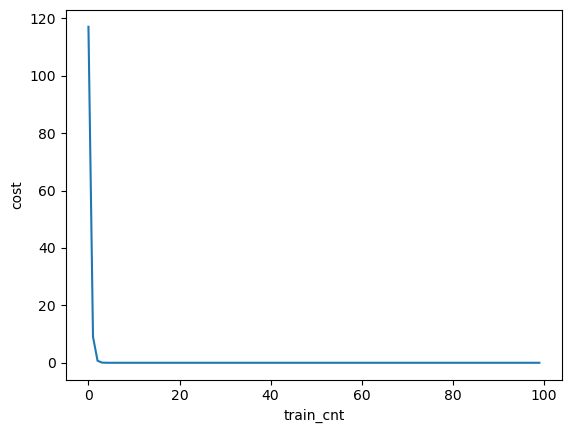

In [22]:
plt.plot(x_train, cost_sum)
plt.xlabel("train_cnt")
plt.ylabel("cost")

Text(0, 0.5, 'w_change')

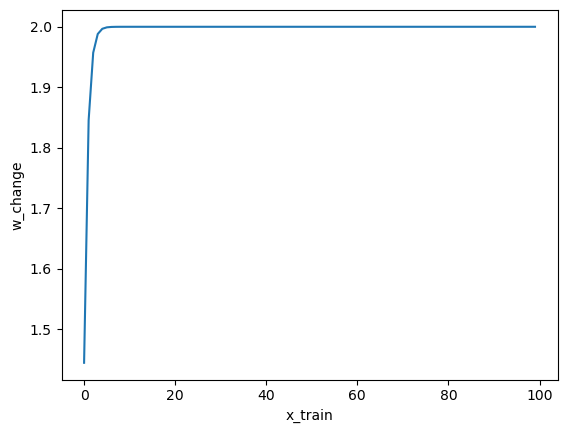

In [23]:
plt.plot(x_train, w_change)
plt.xlabel("x_train")
plt.ylabel("w_change")